# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

> 각 지역 판매량

2) 숫자, 범주?

In [10]:
data[[var]].head()

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


> 숫자

3) NaN 존재 유무 및 조치방안

In [11]:
data[var].isnull().sum()

0

- NaN 없음

4) 가변수화 필요 여부

> 숫자형 변수이므로 필요 없음

5) 기초통계량(수치화)

In [12]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

(array([ 4.,  2.,  5., 11., 14., 33., 45., 38., 38., 51., 43., 36., 21.,
        19., 17., 12.,  6.,  2.,  1.,  2.]),
 array([ 0.    ,  0.8135,  1.627 ,  2.4405,  3.254 ,  4.0675,  4.881 ,
         5.6945,  6.508 ,  7.3215,  8.135 ,  8.9485,  9.762 , 10.5755,
        11.389 , 12.2025, 13.016 , 13.8295, 14.643 , 15.4565, 16.27  ]),
 <BarContainer object of 20 artists>)

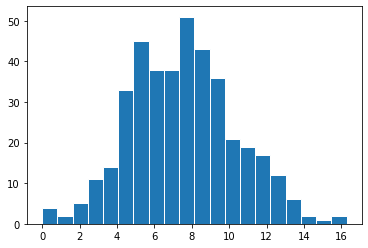

In [21]:
plt.hist(data[var], edgecolor='white', bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x28519d06be0>,
 'caps': [<matplotlib.lines.Line2D at 0x28519d152e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28519d06880>],
 'medians': [<matplotlib.lines.Line2D at 0x28519d159a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28519d15d00>],
 'means': []}

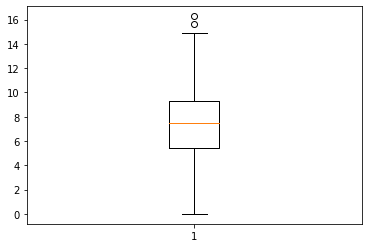

In [19]:
plt.boxplot(data[var])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 대부분의 지역의 판매량이 5천~1만 달러 사이에 몰려있음
- 지역 별로 살고 있는 가족 형태(신혼부부, 1인가구, 다인가구 등)가 다르기 때문에 지역 별 판매량 편차가 있을 수 있음
- 매장 개수 차이 등 다양한 요인이 있을 수 있음

8) 추가 분석해 볼 사항이 있나요?

- 다른 변수와 연결시켜 봐야함

### ② CompPrice

In [22]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

> 경쟁사 가격

2) 숫자, 범주?

In [25]:
data[[var]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CompPrice  400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


> 숫자

3) NaN 존재 유무 및 조치방안

In [26]:
data[var].isnull().sum()

0

> NaN 없음

4) 가변수화 필요 여부

- 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [27]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='CompPrice', ylabel='Count'>

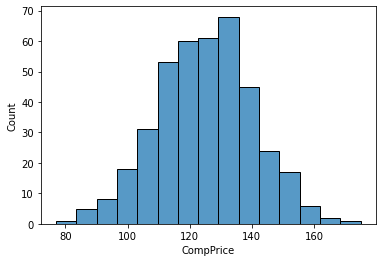

In [30]:
sns.histplot(data[var], bins=15)

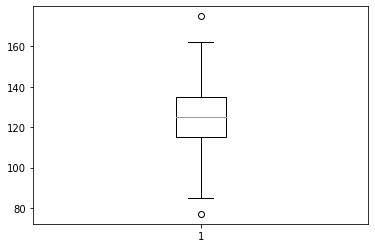

[115.  85.]
[135. 162.]


In [32]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 이상치로 인해 평균은 의미가 없다고 판단됨
- 경쟁사 가격은 대부분 100~140달러 사이에 머물고 있음

8) 추가 분석해 볼 사항이 있나요?

- 자사 판매가격과 비교해 경쟁력 비교
- 지역 별 평균 소득과 판매가격을 비교

### ③ Income

In [33]:
var = 'Income'

1) 변수의 비즈니스 의미

> 지역 평균 소득

2) 숫자, 범주?

In [37]:
data[[var]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Income  400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


> 숫자

3) NaN 존재 유무 및 조치방안

In [38]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

- 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [39]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Income', ylabel='Count'>

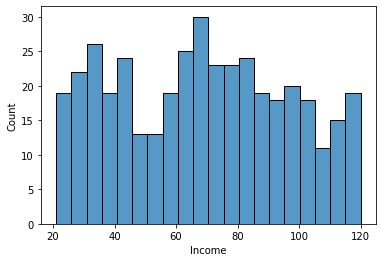

In [47]:
sns.histplot(data[var], bins=20)

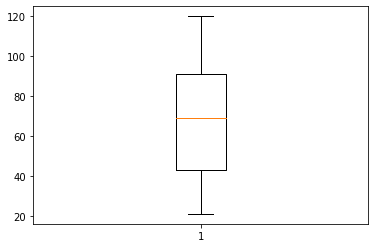

[42.75 21.  ]
[ 91. 120.]


In [45]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 지역 별로 소득 수준 편차가 있음

8) 추가 분석해 볼 사항이 있나요?

- 지역 별 거주 인구의 연령대에 따라 소득 수준이 다르기 때문에 나누어 분석

### ④ Advertising

In [49]:
var = 'Advertising'

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산

2) 숫자, 범주?

In [50]:
data[[var]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Advertising  400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


> 숫자

3) NaN 존재 유무 및 조치방안

In [51]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

> 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [52]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Advertising', ylabel='Count'>

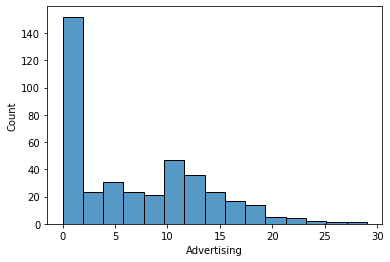

In [54]:
sns.histplot(data[var], bins=15)

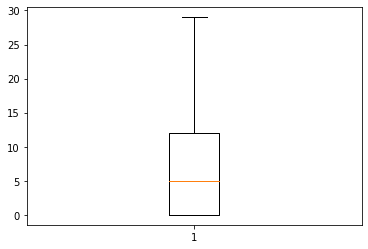

In [55]:
box = plt.boxplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 광고 예산이 없거나 적은 지역, 회사가 대부분을 차지함
- 광고 예산이 적기 때문에 광고를 할 때 한계점이 있을 수밖에 없고 이는 매출 하락으로 이어졌을 것

8) 추가 분석해 볼 사항이 있나요?

- 광고 예산이 0인 지역을 제외하고 분석

### ⑤ Population

In [56]:
var = 'Population'

1) 변수의 비즈니스 의미

> 지역 인구수

2) 숫자, 범주?

In [57]:
data[[var]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


> 숫자

3) NaN 존재 유무 및 조치방안

In [58]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

x

5) 기초통계량(수치화)

In [59]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Population', ylabel='Count'>

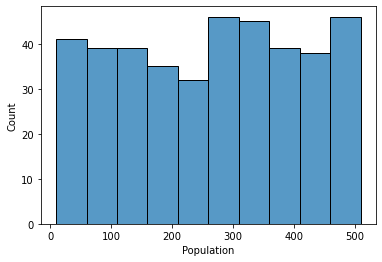

In [60]:
sns.histplot(data[var])

{'whiskers': [<matplotlib.lines.Line2D at 0x2851b7387f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2851b738eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2851b738550>],
 'medians': [<matplotlib.lines.Line2D at 0x2851b744550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2851b7448b0>],
 'means': []}

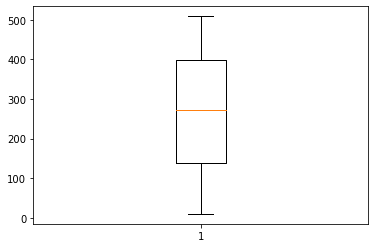

In [61]:
plt.boxplot(data[var])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 균등하게 분포되어 있는 것 처럼 보임

8) 추가 분석해 볼 사항이 있나요?

- 인구 수 대비 매출액과 지점 수를 함께 비교하여 인구 수에 맞게 적절하게 배치되었는지 분석

### ⑥ Price

In [62]:
var = 'Price'

1) 변수의 비즈니스 의미

> 자사 지역 별 판매 가격

2) 숫자, 범주?

In [63]:
data[[var]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


> 숫자

3) NaN 존재 유무 및 조치방안

In [64]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

x

5) 기초통계량(수치화)

In [65]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Price', ylabel='Count'>

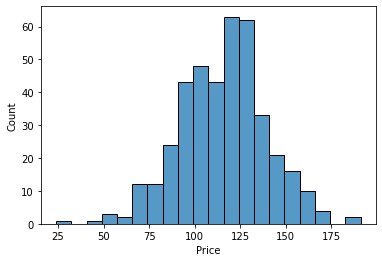

In [66]:
sns.histplot(data[var])

{'whiskers': [<matplotlib.lines.Line2D at 0x2851b828850>,
 'caps': [<matplotlib.lines.Line2D at 0x2851b828f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2851b8284f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2851b835640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2851b8359a0>],
 'means': []}

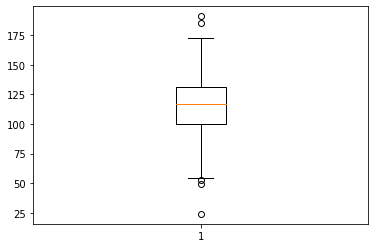

In [67]:
plt.boxplot(data[var])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 이상치가 존재하지만 지역 별 가격의 편차가 크지 않고 고르게 분포되어있음
- 경쟁사 가격대보다 데이터가 퍼져있음 > 상품별로 가격차가 클 수도?

8) 추가 분석해 볼 사항이 있나요?

### ⑦ ShelveLoc

In [4]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

> 진열 상태

2) 숫자, 범주?

In [5]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

> 범주

3) NaN 존재 유무 및 조치방안

In [6]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

- 필요

5) 기초통계량(수치화)

In [8]:
print(data[var].value_counts())
print(data[var].value_counts()/len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


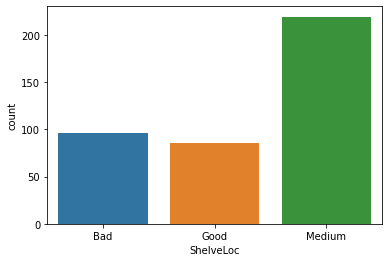

In [11]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 진열상태는 과반수 이상이 평균임
- 진열상태가 나쁜 곳이 20퍼센트 이상이며, 진열상태가 좋지 않으면 판매가 저조해 질 수 있음

8) 추가 분석해 볼 사항이 있나요?

- 진열 상태와 매출 상태를 연결해 분석
- 진열 상태 보통 이상과 이하로 나누어 분석

### ⑧ Age

In [3]:
var = 'Age'

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

In [4]:
data[[var]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


> 숫자

3) NaN 존재 유무 및 조치방안

In [5]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> 숫자형이므로 필요 x

5) 기초통계량(수치화)

In [6]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

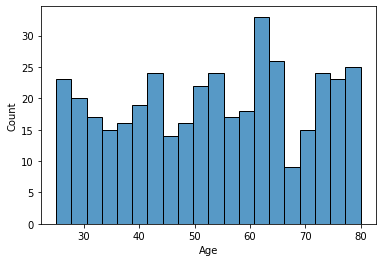

In [12]:
sns.histplot(data[var], bins=20)
plt.show()

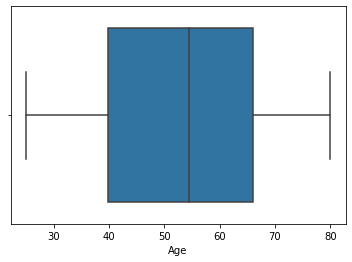

In [11]:
sns.boxplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 대부분의 나이대가 균등하게 분포되어있음
- 70대가 좀 적음

8) 추가 분석해 볼 사항이 있나요?

- 나이대 분포를 10단위로 나누어 살펴볼 필요가 있음

### ⑨ Urban

In [13]:
var = 'Urban'

1) 변수의 비즈니스 의미

> 도심 지역 여부(0,1)

2) 숫자, 범주?

In [14]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

> 범주

3) NaN 존재 유무 및 조치방안

In [15]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

범주형이므로 필요

5) 기초통계량(수치화)

In [18]:
print(data[var].value_counts())
print('\n')
print(data[var].value_counts()/len(data[var]))

Yes    282
No     118
Name: Urban, dtype: int64


Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

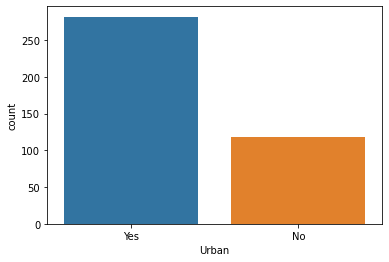

In [19]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 약 70%의 매장이 도심 지역에 있음

8) 추가 분석해 볼 사항이 있나요?

- 도심 지역의 인구, 연령대, 가격 등을 파악해서 분석

### ⑩ US

In [20]:
var = 'US'

1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 여부(0,1)	

2) 숫자, 범주?

In [21]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

> 범주

3) NaN 존재 유무 및 조치방안

In [22]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

> 범주형이므로 필요

5) 기초통계량(수치화)

In [24]:
print(data[var].value_counts())
print('\n')
print(data[var].value_counts()/len(data[var]))

Yes    258
No     142
Name: US, dtype: int64


Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

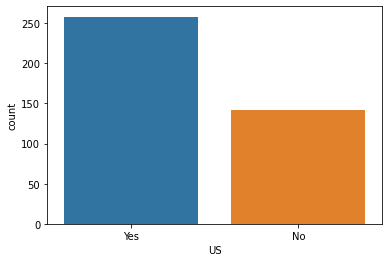

In [25]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 65%정도의 매장이 미국에 있음

8) 추가 분석해 볼 사항이 있나요?

- 미국 내, 외 매장 수, 매출액, 가격 차이